In [1]:
!pip install transformers tokenizers evaluate huggingface_hub --quiet

import numpy as np

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 52.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 13.7 MB/s eta 0:00:00


In [2]:
from huggingface_hub import notebook_login
notebook_login()

# Loading Model and Tokenizer

In [3]:
from transformers import TFAutoModelForSequenceClassification, PreTrainedTokenizerFast
import datasets

tokenizer = PreTrainedTokenizerFast.from_pretrained('raygx/GPT2-NepSA-T1')
tokenizer

PreTrainedTokenizerFast(name_or_path='raygx/GPT2-Nepali-Casual-LM', vocab_size=50000, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '[CLS]', 'eos_token': '[SEP]', 'pad_token': '[PAD]'}, clean_up_tokenization_spaces=True)

In [4]:
from transformers import AutoConfig
from transformers import BertTokenizerFast

print("Loading Model 'distilgpt2")
using = 'gpt'

if using == 'gpt':
  model = TFAutoModelForSequenceClassification.from_pretrained('distilgpt2',
                                      n_head=4,n_layer=3,
                                      bos_token_id=tokenizer.bos_token_id,
                                      eos_token_id=tokenizer.eos_token_id,
                                      pad_token_id=tokenizer.pad_token_id,
                                      id2label={0:"NEUTRAL",1:"POSITIVE",2:"NEGATIVE"},
                                      label2id={"NEUTRAL":0,"POSITIVE":1,"NEGATIVE":2})

  
if using == 'bert':
  print("Loading Model 'distilbert-base-uncased")
  model = TFAutoModelForSequenceClassification.from_config(
      AutoConfig.from_pretrained(
          'distilbert-base-uncased',
          bos_token_id=tokenizer.bos_token_id,
          eos_token_id=tokenizer.eos_token_id,
          pad_token_id=tokenizer.pad_token_id,
          id2label={0:"NEUTRAL",1:"POSITIVE",2:"NEGATIVE"},
          label2id={"NEUTRAL":0,"POSITIVE":1,"NEGATIVE":2}
        )
      )

  tokenizer = BertTokenizerFast.from_pretrained("raygx/GPT2-Nepali-Casual-LM")
  
model.resize_token_embeddings(len(tokenizer))
print(model.config)
print(model.summary())

Loading Model 'distilgpt2


Some layers from the model checkpoint at distilgpt2 were not used when initializing TFGPT2ForSequenceClassification: ['transformer/h_._5/mlp/c_proj/weight:0', 'transformer/h_._5/ln_1/gamma:0', 'transformer/h_._3/ln_2/beta:0', 'transformer/h_._4/attn/c_proj/weight:0', 'transformer/h_._4/mlp/c_proj/weight:0', 'transformer/h_._4/attn/c_proj/bias:0', 'transformer/h_._4/attn/c_attn/bias:0', 'transformer/h_._3/mlp/c_fc/bias:0', 'transformer/h_._5/attn/c_proj/bias:0', 'transformer/h_._3/attn/c_attn/weight:0', 'transformer/h_._4/mlp/c_proj/bias:0', 'transformer/h_._3/mlp/c_fc/weight:0', 'transformer/h_._5/ln_1/beta:0', 'transformer/h_._5/ln_2/gamma:0', 'transformer/h_._3/mlp/c_proj/bias:0', 'transformer/h_._3/ln_1/beta:0', 'transformer/h_._4/attn/c_attn/weight:0', 'transformer/h_._5/mlp/c_fc/weight:0', 'transformer/h_._4/ln_2/gamma:0', 'transformer/h_._4/ln_2/beta:0', 'transformer/h_._4/mlp/c_fc/bias:0', 'transformer/h_._4/mlp/c_fc/weight:0', 'transformer/h_._3/mlp/c_proj/weight:0', 'transform

GPT2Config {
  "_name_or_path": "distilgpt2",
  "_num_labels": 1,
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 1,
  "embd_pdrop": 0.1,
  "eos_token_id": 2,
  "id2label": {
    "0": "NEUTRAL",
    "1": "POSITIVE",
    "2": "NEGATIVE"
  },
  "initializer_range": 0.02,
  "label2id": {
    "NEGATIVE": 2,
    "NEUTRAL": 0,
    "POSITIVE": 1
  },
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 1024,
  "n_embd": 768,
  "n_head": 4,
  "n_inner": null,
  "n_layer": 3,
  "n_positions": 1024,
  "pad_token_id": 3,
  "reorder_and_upcast_attn": false,
  "resid_pdrop": 0.1,
  "scale_attn_by_inverse_layer_idx": false,
  "scale_attn_weights": true,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "task_specific_params": {
    "text-generation": {
      "do_sample": true,
      "max_length": 50
    }
 

In [5]:
from transformers import create_optimizer, AdamWeightDecay
import tensorflow as tf

optimizer = AdamWeightDecay(learning_rate=5e-7, weight_decay_rate=0.009)
model.compile(optimizer=optimizer)

No loss specified in compile() - the model's internal loss computation will be used as the loss. Don't panic - this is a common way to train TensorFlow models in Transformers! To disable this behaviour please pass a loss argument, or explicitly pass `loss=None` if you do not want your model to compute a loss.


# Data Loading and Preparation

In [6]:
data = datasets.load_dataset("raygx/NepCov19Tweets")
data = data.rename_columns({"Sentiment":"labels","Sentences":"text"})
data

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/33471 [00:00<?, ? examples/s]

Dataset parquet downloaded and prepared to /root/.cache/huggingface/datasets/raygx___parquet/raygx--NepCov19Tweets-11ff376905985191/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['labels', 'text'],
        num_rows: 33471
    })
})

In [7]:
data = data.shuffle(999)
data = data['train'].train_test_split(test_size=0.2)
data

DatasetDict({
    train: Dataset({
        features: ['labels', 'text'],
        num_rows: 26776
    })
    test: Dataset({
        features: ['labels', 'text'],
        num_rows: 6695
    })
})

In [8]:
def prepareLabels(row):
    if row['labels'] == -1:
        row['labels'] = 2
        
    return row

data = data.map(
        prepareLabels,
        num_proc=4)

print(data)

Map (num_proc=4):   0%|          | 0/26776 [00:00<?, ? examples/s]

Map (num_proc=4):   0%|          | 0/6695 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['labels', 'text'],
        num_rows: 26776
    })
    test: Dataset({
        features: ['labels', 'text'],
        num_rows: 6695
    })
})


In [9]:
%%time

def preprocess_function(rows):
    return tokenizer(rows['text'],truncation=True)

print("Tokenizing the data")
tokenized_inputs = data.map(
    preprocess_function,
    batched=True,
    num_proc=2,
    remove_columns=data["train"].column_names,
)
tokenized_inputs = tokenized_inputs.remove_columns(['token_type_ids'])

tokenized_inputs['train'] = tokenized_inputs['train'].add_column(
    name="labels",column=data['train']['labels']
)
tokenized_inputs['test'] = tokenized_inputs['test'].add_column(
    name="labels",column=data['test']['labels']
)

tokenized_inputs

Tokenizing the data


Map (num_proc=2):   0%|          | 0/26776 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Map (num_proc=2):   0%|          | 0/6695 [00:00<?, ? examples/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


CPU times: user 473 ms, sys: 220 ms, total: 693 ms
Wall time: 6.25 s


DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 26776
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 6695
    })
})

In [10]:
print(data['train'][:1])
print(tokenized_inputs['train'][:1]['input_ids'])
print(tokenizer.batch_decode(tokenized_inputs['train'][:1]['input_ids']))

{'labels': [0], 'text': ['धेरै महोदय कोभिड पछि पनि मास्क नलगाइ हिँड्न गाह्रो पर्ने अवस्थामा पुगेका छन् जुन ठाडो बदमासी गरेकाले पनि हुनसक्छ नाङ्गो बदमासीको साक्षी किनारा बसेर पनि हुनसक्छ शासकको निगरानी गर्नुपर्ने अख्तियार कसरी सत्ताको ताबेदार बन्दैछ को प्रहार']}
[[664, 25723, 1752, 788, 301, 11709, 10937, 11911, 12003, 4180, 992, 1245, 2490, 340, 1248, 11580, 27467, 6449, 301, 4174, 23607, 22629, 2606, 11839, 12008, 3058, 301, 4174, 31231, 7173, 1475, 4301, 1528, 9034, 1239, 191, 3181, 21007, 364, 3472]]
['धेरै महोदय कोभिड पछि पनि मास्क नलगाइ हिँड्न गाह्रो पर्ने अवस्थामा पुगेका छन् जुन ठाडो बदमासी गरेकाले पनि हुनसक्छ नाङ्गो बदमासीको साक्षी किनारा बसेर पनि हुनसक्छ शासकको निगरानी गर्नुपर्ने अख्तियार कसरी सत्ताको ताबेदार बन्दैछ को प्रहार']


In [11]:
from transformers import DataCollatorWithPadding

print("Initializing Data Collator")
data_collator = DataCollatorWithPadding(tokenizer=tokenizer, 
                                        max_length=128,
                                        return_tensors="tf")

Initializing Data Collator


In [12]:
print("Preparing Training and Testing sets to TRAIN the MODEL")
tf_train_set = model.prepare_tf_dataset(
    tokenized_inputs["train"],
    shuffle=True,
    batch_size=16,
    collate_fn=data_collator,
)

tf_test_set = model.prepare_tf_dataset(
    tokenized_inputs["test"],
    shuffle=False,
    batch_size=16,
    collate_fn=data_collator,
)

You're using a PreTrainedTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Preparing Training and Testing sets to TRAIN the MODEL


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2382: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(


# Training and Evaluation

## Training **Batch 1**

In [13]:
%%time

n_epoch = 20
print("Training the model")
history = model.fit(x=tf_train_set, 
          validation_data=tf_test_set,
          epochs=n_epoch)
print(history.history)

Training the model
Epoch 1/20
1673/1673 [==============================] - 137s 75ms/step - loss: 1.2175 - val_loss: 1.0810
Epoch 2/20
1673/1673 [==============================] - 127s 76ms/step - loss: 1.0754 - val_loss: 1.0312
Epoch 3/20
1673/1673 [==============================] - 127s 76ms/step - loss: 1.0320 - val_loss: 0.9977
Epoch 4/20
1673/1673 [==============================] - 126s 76ms/step - loss: 1.0028 - val_loss: 0.9739
Epoch 5/20
1673/1673 [==============================] - 127s 76ms/step - loss: 0.9810 - val_loss: 0.9559
Epoch 6/20
1673/1673 [==============================] - 126s 75ms/step - loss: 0.9645 - val_loss: 0.9405
Epoch 7/20
1673/1673 [==============================] - 126s 75ms/step - loss: 0.9506 - val_loss: 0.9275
Epoch 8/20
1673/1673 [==============================] - 128s 77ms/step - loss: 0.9353 - val_loss: 0.9174
Epoch 9/20
1673/1673 [==============================] - 125s 75ms/step - loss: 0.9262 - val_loss: 0.9084
Epoch 10/20
1673/1673 [=============

<Axes: >

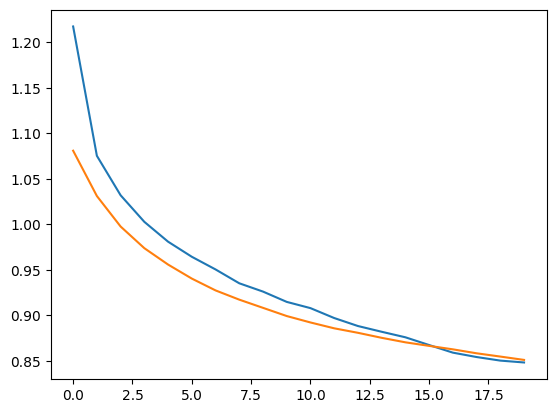

In [14]:
import seaborn

seaborn.lineplot(history.history['loss'])
seaborn.lineplot(history.history['val_loss'])

### Evaluation

In [15]:
%%time
from transformers import pipeline, TextClassificationPipeline

if using=='gpt':
  print("Getting Test Prediction")
  pipe = pipeline('sentiment-analysis',model=model,tokenizer=tokenizer,device=1)
  prediction = pipe(data['test']['text'])

  print("Prediction Label to Id")
  pred_labels = [model.config.label2id[x['label']] for x in prediction]
else:  
  print("Getting Test Prediction")
  pred_labels = [np.argmax(tf.nn.softmax(model(tf.constant(x)).logits)) for x in tokenized_inputs['test']['input_ids']]

actual_labels = data['test']['labels']

Getting Test Prediction
Prediction Label to Id
CPU times: user 6min 5s, sys: 3.39 s, total: 6min 9s
Wall time: 6min 6s


**Computing F1-Score, Precision, Recall and Accuracy of the Model**

In [16]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

print("F1-Score",f1_score(actual_labels,pred_labels,average='weighted'))
print("Precision-Score",precision_score(actual_labels,pred_labels,average='weighted'))
print("Recall-Score",recall_score(actual_labels,pred_labels,average='weighted'))
print("accuracy_Score",accuracy_score(actual_labels,pred_labels))

F1-Score 0.2908059472791212
Precision-Score 0.5447921074223531
Recall-Score 0.43032113517550413
accuracy_Score 0.43032113517550413


**Plotting Confusion Matrix**

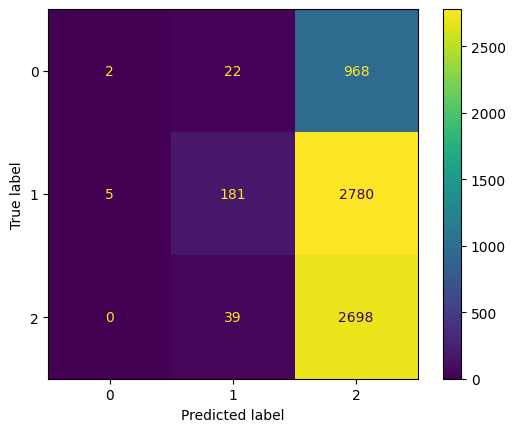

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cmd = ConfusionMatrixDisplay(tf.math.confusion_matrix(actual_labels,pred_labels,num_classes=3).numpy())
cmd.plot()

**Pushing Model to Huggingface Hub**

In [18]:
### Pushing Model to hub
if using=='gpt':
  model.push_to_hub("raygx/GPT2-NepSA-T1",commit_message="Training From Scratch:Distilgpt2;3L4H:Batch 1:Epoch 20")

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

tf_model.h5:   0%|          | 0.00/395M [00:00<?, ?B/s]

## Training **Batch 2**

In [19]:
%%time
n_epoch = 10
print("Training the model")
history = model.fit(x=tf_train_set, 
          validation_data=tf_test_set,
          epochs=n_epoch)
print(history.history)

Training the model
Epoch 1/10
   2/1673 [..............................] - ETA: 2:23 - loss: 1.0371

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2382: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(


1673/1673 [==============================] - 124s 74ms/step - loss: 0.8414 - val_loss: 0.8475
Epoch 2/10
1673/1673 [==============================] - 124s 74ms/step - loss: 0.8360 - val_loss: 0.8439
Epoch 3/10
1673/1673 [==============================] - 124s 74ms/step - loss: 0.8314 - val_loss: 0.8409
Epoch 4/10
1673/1673 [==============================] - 125s 75ms/step - loss: 0.8270 - val_loss: 0.8383
Epoch 5/10
1673/1673 [==============================] - 124s 74ms/step - loss: 0.8237 - val_loss: 0.8357
Epoch 6/10
1673/1673 [==============================] - 125s 75ms/step - loss: 0.8197 - val_loss: 0.8325
Epoch 7/10
1673/1673 [==============================] - 124s 74ms/step - loss: 0.8146 - val_loss: 0.8299
Epoch 8/10
1673/1673 [==============================] - 125s 75ms/step - loss: 0.8123 - val_loss: 0.8279
Epoch 9/10
1673/1673 [==============================] - 124s 74ms/step - loss: 0.8068 - val_loss: 0.8251
Epoch 10/10
1673/1673 [==============================] - 124s 74ms

<Axes: >

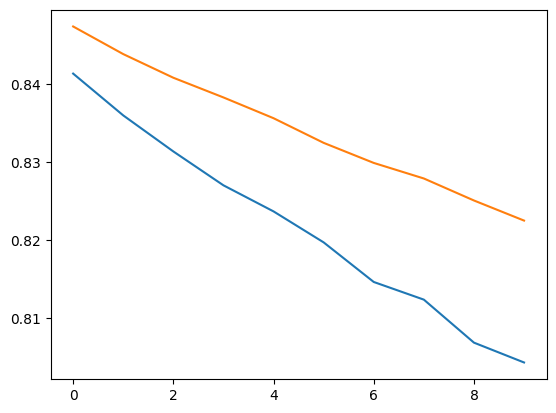

In [20]:
import seaborn

seaborn.lineplot(history.history['loss'])
seaborn.lineplot(history.history['val_loss'])

### Evaluation

In [21]:
%%time
from transformers import pipeline, TextClassificationPipeline

if using=='gpt':
  def batchPrediction(rows):
    pass

  print("Getting Test Prediction")
  pipe = pipeline('sentiment-analysis',model=model,tokenizer=tokenizer,device=1)
  prediction = pipe(data['test']['text'])

  print("Prediction Label to Id")
  pred_labels = [model.config.label2id[x['label']] for x in prediction]
else:  
  print("Getting Test Prediction")
  pred_labels = [np.argmax(tf.nn.softmax(model(tf.constant(x)).logits)) for x in tokenized_inputs['test']['input_ids']]

actual_labels = data['test']['labels']

Getting Test Prediction
Prediction Label to Id
CPU times: user 6min 14s, sys: 3.55 s, total: 6min 18s
Wall time: 6min 27s


**Computing F1-Score, Precision, Recall and Accuracy of the Model**

In [22]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

print("F1-Score",f1_score(actual_labels,pred_labels,average='weighted'))
print("Precision-Score",precision_score(actual_labels,pred_labels,average='weighted'))
print("Recall-Score",recall_score(actual_labels,pred_labels,average='weighted'))
print("accuracy_Score",accuracy_score(actual_labels,pred_labels))

F1-Score 0.26954615746519
Precision-Score 0.6298756613049458
Recall-Score 0.42270351008215085
accuracy_Score 0.42270351008215085


**Plotting Confusion Matrix**

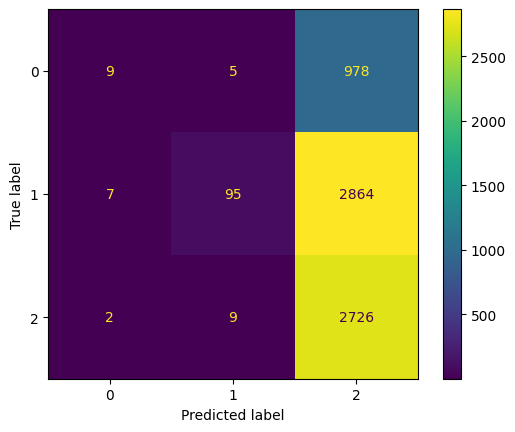

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cmd = ConfusionMatrixDisplay(tf.math.confusion_matrix(actual_labels,pred_labels,num_classes=3).numpy())
cmd.plot()

**Pushing Model to Huggingface Hub**

In [24]:
# tokenizer.push_to_hub("raygx/GPT2-NepSA-T1")

CommitInfo(commit_url='https://huggingface.co/raygx/GPT2-NepSA-T1/commit/0e27fdd0587632072b9187c0e440881cd8b4ffa9', commit_message='Upload tokenizer', commit_description='', oid='0e27fdd0587632072b9187c0e440881cd8b4ffa9', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
### Pushing Model to hub
if using=='gpt':
  model.push_to_hub("raygx/GPT2-NepSA-T1",commit_message="Training From Scratch:Distilgpt2;3L4H:Batch 1:Epoch 40")